In [10]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

<font color=red><h2>1. Trend following techniques</h2></font>

<font color=green><h3>1.1 L1 - First order</h3></font>

In [11]:
def L1_C(y,lamb):
    n=len(y)
    D=np.zeros((n-1,n))
    for i in range(n-1):
        D[i,i]=-1
        D[i,i+1]=1
    x = cp.Variable(n)
    objective = cp.Minimize(0.5 * cp.sum_squares(y - x) + lamb * cp.norm1(D @ x))
    problem = cp.Problem(objective)
    problem.solve()

    return x.value

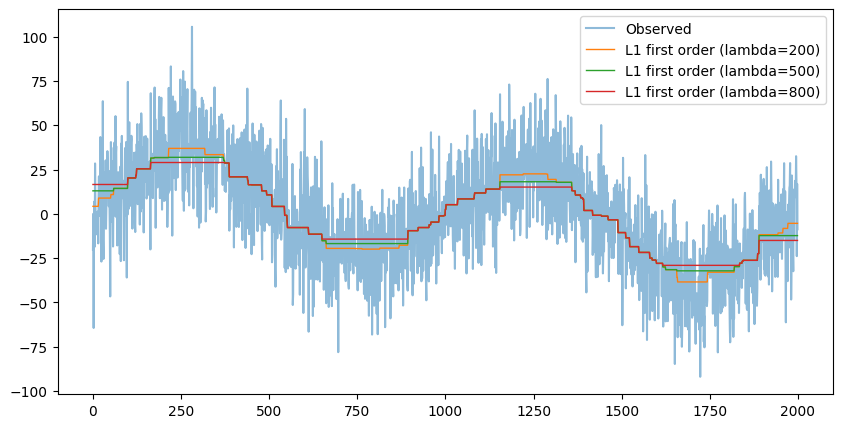

In [12]:
# Generating a random signal
n = 2000
x = np.linspace(0, 4 * np.pi, n)
x_t = 30 * np.sin(x) + 10 * np.sin(0.5 * x) 
noise = np.random.normal(0, 20, n)
y_b = x_t + noise



x_l1_first=L1_C(y_b,lamb=200)
xx_l1_first=L1_C(y_b,lamb=500)
xxx_l1_first=L1_C(y_b,lamb=800)
plt.figure(figsize=(10, 5))
plt.plot(y_b, label='Observed', alpha=0.5)
plt.plot(x_l1_first, label='L1 first order (lambda=200)', linewidth=1)
plt.plot(xx_l1_first, label='L1 first order (lambda=500)', linewidth=1)
plt.plot(xxx_l1_first, label='L1 first order (lambda=800)', linewidth=1)
plt.legend()

<font color=green><h3>1.2 L1 - Second order</h3></font>

In [13]:
def L1_T(y,lamb):
    n=len(y)
    D=np.zeros((n-2,n))
    for i in range(n-2):
        D[i,i]=1
        D[i,i+1]=-2
        D[i,i+2]=1
    x = cp.Variable(n)
    objective = cp.Minimize(0.5 * cp.sum_squares(y - x) + lamb * cp.norm1(D @ x))
    problem = cp.Problem(objective)
    problem.solve()

    return x.value

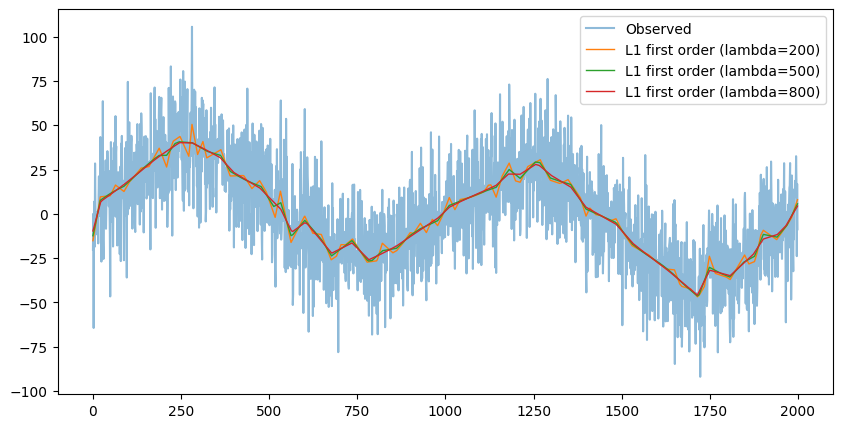

In [14]:
x_l1_second=L1_T(y_b,lamb=200)
xx_l1_second=L1_T(y_b,lamb=500)
xxx_l1_second=L1_T(y_b,lamb=800)
plt.figure(figsize=(10, 5))
plt.plot(y_b, label='Observed', alpha=0.5)
plt.plot(x_l1_second, label='L1 first order (lambda=200)', linewidth=1)
plt.plot(xx_l1_second, label='L1 first order (lambda=500)', linewidth=1)
plt.plot(xxx_l1_second, label='L1 first order (lambda=800)', linewidth=1)
plt.legend()

<font color=green><h3>1.3 Hodrick-Prescott - First order</h3></font>

In [15]:
def HP_filter_first(y,lamb):
    n=len(y)
    D=np.zeros((n-1,n))
    for i in range(n-1):
        D[i,i]=-1
        D[i,i+1]=1

    x = cp.Variable(n)
    objective = cp.Minimize(0.5 * cp.sum_squares(y - x) + lamb * cp.sum_squares(D @ x))
    problem = cp.Problem(objective)
    problem.solve()

    return(x.value)

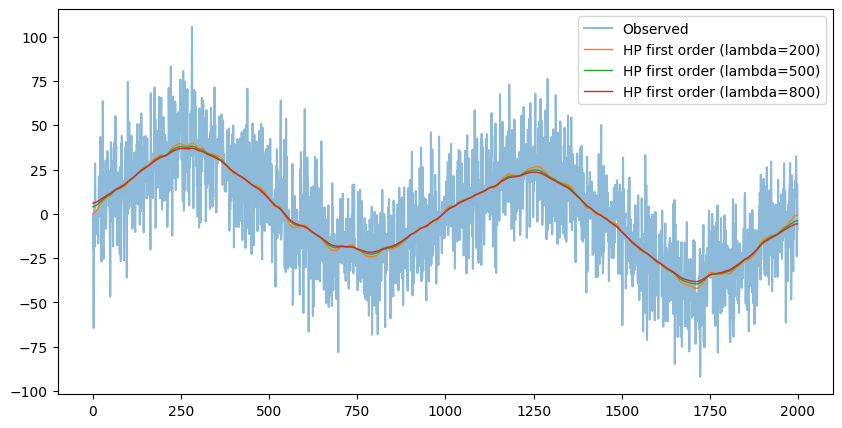

In [16]:
x_hp_first=HP_filter_first(y_b,lamb=200)
xx_hp_first=HP_filter_first(y_b,lamb=500)
xxx_hp_first=HP_filter_first(y_b,lamb=800)
plt.figure(figsize=(10, 5))
plt.plot(y_b, label='Observed', alpha=0.5)
plt.plot(x_hp_first, label='HP first order (lambda=200)', linewidth=1)
plt.plot(xx_hp_first, label='HP first order (lambda=500)', linewidth=1)
plt.plot(xxx_hp_first, label='HP first order (lambda=800)', linewidth=1)

plt.legend()

<font color=green><h3>1.4 Hodrick-Prescott - Second order</h3></font>

In [17]:
def HP_filter_second(y,lamb):
    n=len(y)
    D=np.zeros((n-2,n))
    for i in range(n-2):
        D[i,i]=1
        D[i,i+1]=-2
        D[i,i+2]=1
    I=np.eye(n)
    x=np.dot(np.linalg.inv(I+2*lamb*np.dot(D.T,D)),y)
    return(x)

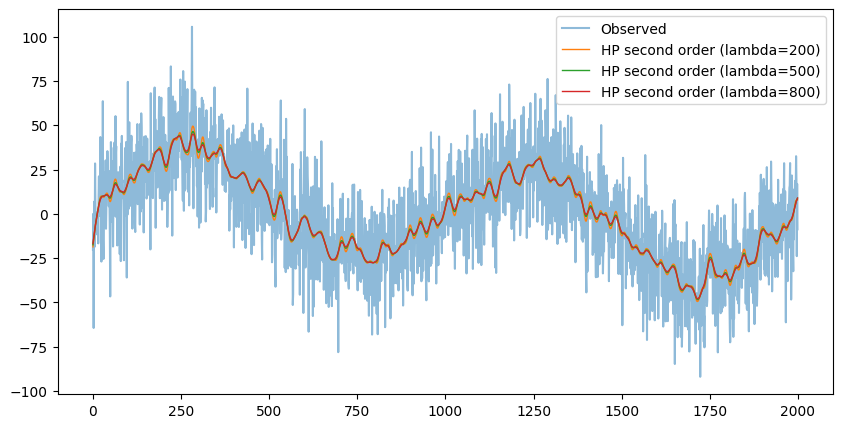

In [18]:
x_hp_second=HP_filter_second(y_b,lamb=200)
xx_hp_second=HP_filter_second(y_b,lamb=500)
xxx_hp_second=HP_filter_second(y_b,lamb=800)
plt.figure(figsize=(10, 5))
plt.plot(y_b, label='Observed', alpha=0.5)
plt.plot(x_hp_second, label='HP second order (lambda=200)', linewidth=1)
plt.plot(xx_hp_second, label='HP second order (lambda=500)', linewidth=1)
plt.plot(xxx_hp_second, label='HP second order (lambda=800)', linewidth=1)
plt.legend()